In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.api import VAR
from pandas_datareader import data as pdr
import datetime
import numpy as np

In [7]:
from fredapi import Fred


In [268]:
df=pd.read_csv('final_df.csv')
df= df.rename(columns = {"Price":'S&P 500'})
df['Date'] = pd.to_datetime(df['Date'])

df

,Unnamed: 0,Date,10YR_Treasury_Yield,Real_GDP US,S&P 500
0,0,1985-01-01,11.58,8400.820,164.180000
1,1,1985-04-01,10.81,8474.787,181.180000
2,2,1985-07-01,10.34,8604.220,189.720000
3,3,1985-10-01,9.76,8668.188,188.080000
4,4,1986-01-01,8.56,8749.127,198.990000
...,...,...,...,...,...
151,151,2022-10-01,3.83,21989.981,4228.478488
152,152,2023-01-01,3.65,22112.329,3965.339301
153,153,2023-04-01,3.59,22225.350,4079.094662
154,154,2023-07-01,4.15,22491.567,4191.979788


In [269]:
df= df.drop('Unnamed: 0', axis =1)

In [270]:
ndf

,10YR_Treasury_Yield,Real_GDP US,S&P 500,residuals
Date,,,,
1986-10-01,1.982380,9.096073,5.520540,-3.221180
1987-04-01,2.121063,9.114188,5.654172,-2.274686
1987-07-01,2.183802,9.122822,5.628376,-3.130603
1987-10-01,2.210470,9.139846,5.813653,-1.750705
1989-10-01,2.068128,9.204198,5.846525,-3.749172
...,...,...,...,...
2022-07-01,1.134623,9.992008,8.269081,-2.128366
2022-10-01,1.342865,9.998342,8.349598,-1.847278
2023-01-01,1.294727,10.003891,8.285347,-2.507273


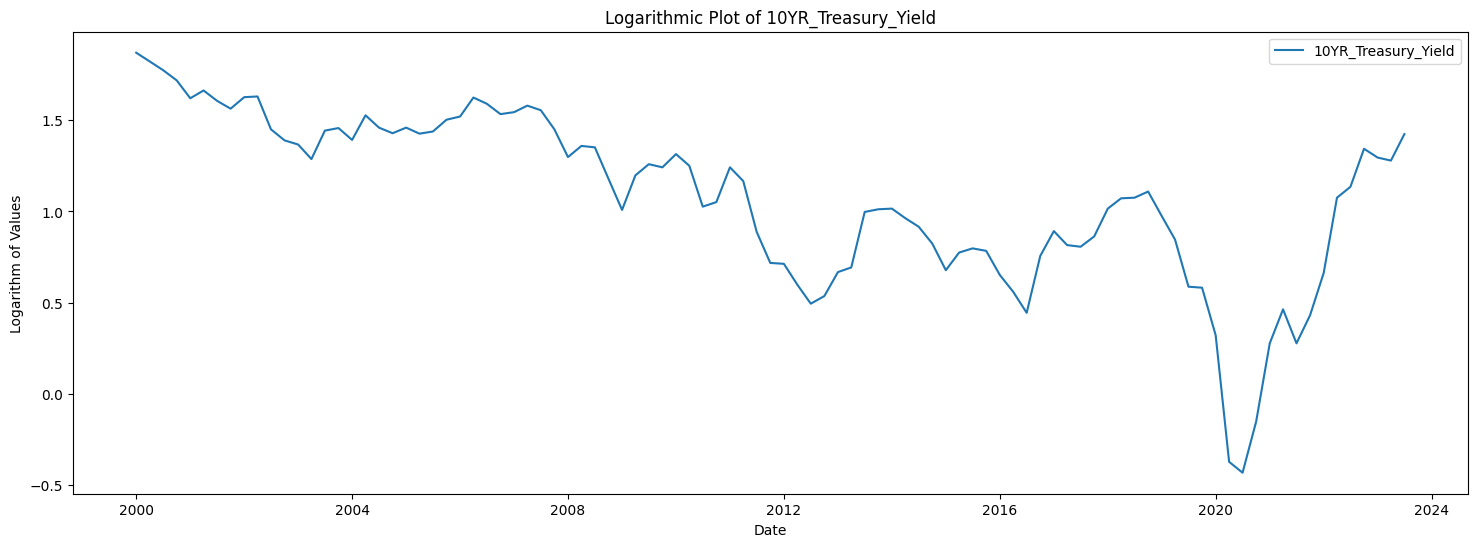

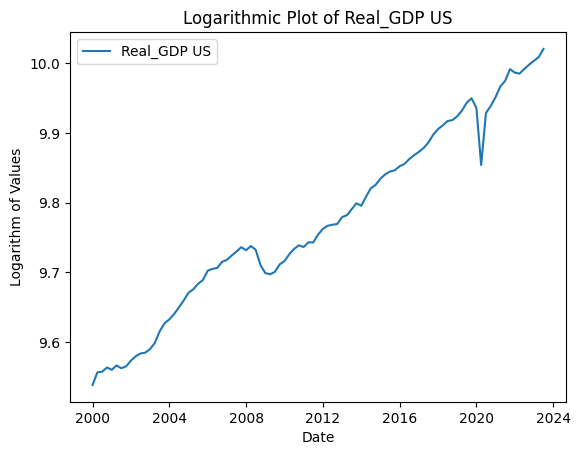

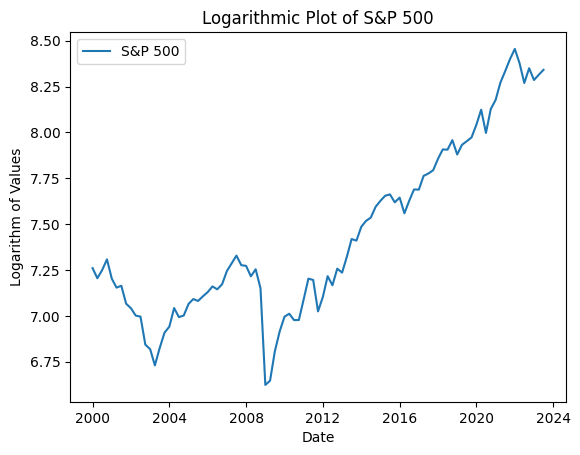

In [273]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure 'Date' is in datetime format and set it as index
df = df.set_index('Date')

# Apply logarithmic transformation
ndf = np.log(df.dropna())

# Convert the DateTimeIndex to a PeriodIndex with quarterly frequency
ndf.index = ndf.index.to_period(freq='Q')

# Convert PeriodIndex back to DateTimeIndex for plotting
ndf.index = ndf.index.to_timestamp()
ndf=ndf['2000':'2024']
# Set a larger figure size for better visibility
plt.figure(figsize=(18, 6))

# Loop through each column to create individual plots
for i in ndf.columns:
    plt.plot(ndf[i], label=i)  # Add label for legend
    plt.title(f'Logarithmic Plot of {i}')
    plt.xlabel('Date')
    plt.ylabel('Logarithm of Values')

    plt.legend()    # Display legend
    plt.show()


In [274]:
ndf


,10YR_Treasury_Yield,Real_GDP US,S&P 500
Date,,,
2000-01-01,1.868721,9.538071,7.259820
2000-04-01,1.821318,9.556120,7.204959
2000-07-01,1.773256,9.557139,7.249180
2000-10-01,1.717395,9.563091,7.307685
2001-01-01,1.619388,9.559808,7.202378
...,...,...,...
2022-07-01,1.134623,9.992008,8.269081
2022-10-01,1.342865,9.998342,8.349598
2023-01-01,1.294727,10.003891,8.285347


In [275]:
ndf.columns

Index(['10YR_Treasury_Yield', 'Real_GDP US', 'S&P 500'], dtype='object')

,10YR_Treasury_Yield,Real_GDP US,S&P 500,residuals
Date,,,,
1985-01-01,2.449279,9.036085,5.100963,NaN
1985-04-01,2.380472,9.044851,5.199491,NaN
1985-07-01,2.336020,9.060008,5.245549,NaN
1985-10-01,2.278292,9.067415,5.236867,NaN
1986-01-01,2.147100,9.076709,5.293255,NaN
...,...,...,...,...
2022-10-01,1.342865,9.998342,8.349598,-1.847278
2023-01-01,1.294727,10.003891,8.285347,-2.507273
2023-04-01,1.278152,10.008989,8.313630,-2.345013


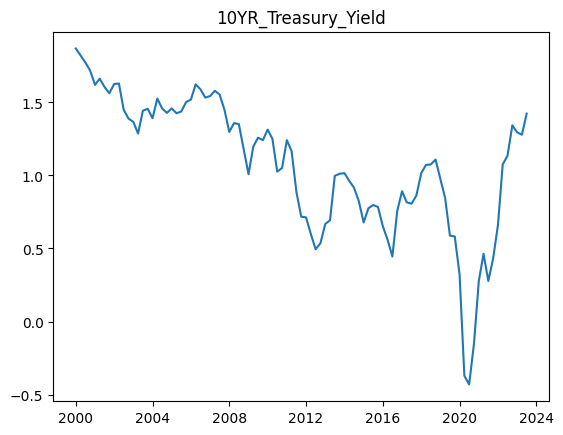

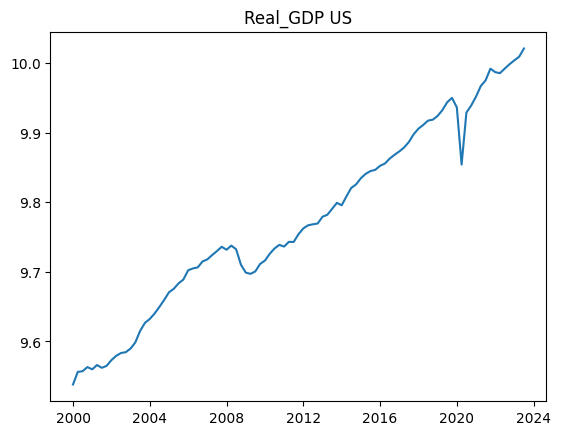

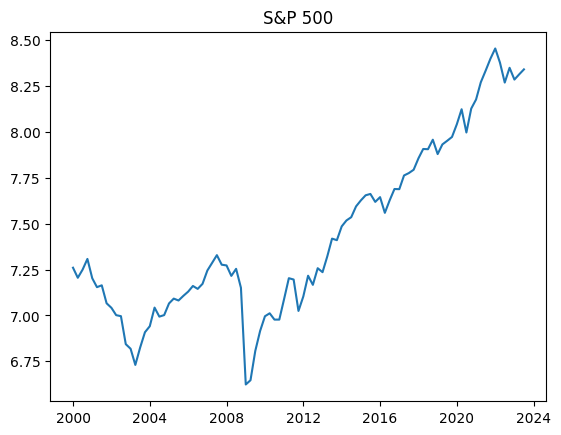

In [276]:
for i in ndf.columns :
  plt.plot(ndf[i])
  plt.title(i)
  plt.show()

#ADF test for level data

In [55]:
ndf[]

,10YR_Treasury_Yield,Real_GDP US,S&P 500
Date,,,
1985-01-01,2.449279,9.036085,5.100963
1985-04-01,2.380472,9.044851,5.199491
1985-07-01,2.336020,9.060008,5.245549
1985-10-01,2.278292,9.067415,5.236867
1986-01-01,2.147100,9.076709,5.293255
...,...,...,...
2022-07-01,1.134623,9.992008,8.269081
2022-10-01,1.342865,9.998342,8.349598
2023-01-01,1.294727,10.003891,8.285347


In [277]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def test_stationarity_for_all_columns(df):
    """
    Test the stationarity of every column in a DataFrame.

    Args:
    file_path (str): The file path of the CSV file.

    Returns:
    dict: A dictionary containing the Augmented Dickey-Fuller test results for each column.
    """
    # Load the dataset


    # Dictionary to store results
    results = {}

    # Perform ADF test on each column
    for column in df.columns:
        # Skip non-numeric columns
        if df[column].dtype not in ['float64', 'int64']:
            continue

        # Perform Augmented Dickey-Fuller test
        result = adfuller(df[column].dropna(), autolag='AIC')

        # Store results
        results[column] = {
            'Test Statistic': result[0],
            'p-value': result[1],
            'Lags Used': result[2],
            'Number of Observations Used': result[3],
            'Critical Values': result[4]
        }
        if (results[column]['p-value'])< 0.05:
          print (f"{column} is stationnary")
        else :
          print (f"{column} is not stationnary")
    return results

# Path to the dataset


In [278]:
test_stationarity_for_all_columns(ndf)

10YR_Treasury_Yield is not stationnary
Real_GDP US is not stationnary
S&P 500 is not stationnary


{'10YR_Treasury_Yield': {'Test Statistic': -2.1113414981982226,
  'p-value': 0.2399786512699449,
  'Lags Used': 2,
  'Number of Observations Used': 92,
  'Critical Values': {'1%': -3.503514579651927,
   '5%': -2.893507960466837,
   '10%': -2.583823615311909}},
 'Real_GDP US': {'Test Statistic': -0.06237140827840843,
  'p-value': 0.9530598863752107,
  'Lags Used': 1,
  'Number of Observations Used': 93,
  'Critical Values': {'1%': -3.502704609582561,
   '5%': -2.8931578098779522,
   '10%': -2.583636712914788}},
 'S&P 500': {'Test Statistic': 0.11740278573421185,
  'p-value': 0.9672293731711039,
  'Lags Used': 0,
  'Number of Observations Used': 94,
  'Critical Values': {'1%': -3.5019123847798657,
   '5%': -2.892815255482889,
   '10%': -2.583453861475781}}}

In [260]:
ndf= ndf.dropna()

In [279]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

def regress_on_trend(df):
    """
    For each column in the DataFrame, decompose into trend and other components,
    then regress the series on its trend to check for drift and time trend.

    Parameters:
    df (pd.DataFrame): A pandas DataFrame with time series data in each column.

    Returns:
    dict: A dictionary where each key is a column name and each value is a tuple
          containing the regression result summary and the trend component.
    """
    results = {}
    for column in df.columns:
        # Decompose the series
        decomposed = seasonal_decompose(df[column], model='additive', period=1)  # Assuming no seasonality
        trend = decomposed.trend.dropna()  # Extract trend and drop NaN values that arise from decomposition

        # Create a time index starting from 1 for the length of the trend component
        time_index = np.arange(1, len(trend) + 1)

        # Add a constant to the model (intercept)
        X = sm.add_constant(time_index)

        # Fit the OLS model of the series on the trend
        model = sm.OLS(trend, X).fit()

        # Store the summary of the regression results and the trend component
        results[column] = (model.summary(), trend)

    return results

# Example usage:
# Assuming you have a DataFrame 'your_dataframe' with time series data in each column
trend_regression_results = regress_on_trend(ndf)
# for


In [281]:
trend_regression_results

{'10YR_Treasury_Yield': (<class 'statsmodels.iolib.summary.Summary'>
  """
                              OLS Regression Results                            
  Dep. Variable:                  trend   R-squared:                       0.534
  Model:                            OLS   Adj. R-squared:                  0.529
  Method:                 Least Squares   F-statistic:                     106.7
  Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.11e-17
  Time:                        18:03:52   Log-Likelihood:                -25.739
  No. Observations:                  95   AIC:                             55.48
  Df Residuals:                      93   BIC:                             60.59
  Df Model:                           1                                         
  Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
  --------------------------------

In [163]:
# Assuming df has a DateTimeIndex


In [282]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Assume df is your dataframe with columns ['SNP', 'GDP', 'Treasury_Yield']

# Step 1: Estimate the long-run equilibrium relationship (cointegration equation)
data=ndf.copy()

# Independent variables matrix (with a constant term for the intercept)
X = sm.add_constant(data[['Real_GDP US', '10YR_Treasury_Yield']])
Y = data['S&P 500']

model = sm.OLS(Y, X).fit()
data['residuals'] = model.resid

# Step 2: Test the residuals for stationarity using the ADF test
adf_result = adfuller(data['residuals'])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
for key, value in adf_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# If the p-value is low enough, typically <0.05, you can reject the null hypothesis
# that there is a unit root present in the residuals series (Z_t).
# This means that Z_t is stationary, and thus, the series are cointegrated.


ADF Statistic: -3.047720604629301
p-value: 0.030671884337365347
Critial Values:
   1%, -3.5019123847798657
Critial Values:
   5%, -2.892815255482889
Critial Values:
   10%, -2.583453861475781


In [264]:
ndf

,10YR_Treasury_Yield,Real_GDP US,S&P 500,residuals
Date,,,,
1986-10-01,1.982380,9.096073,5.520540,-3.221180
1987-04-01,2.121063,9.114188,5.654172,-2.274686
1987-07-01,2.183802,9.122822,5.628376,-3.130603
1987-10-01,2.210470,9.139846,5.813653,-1.750705
1989-10-01,2.068128,9.204198,5.846525,-3.749172
...,...,...,...,...
2022-07-01,1.134623,9.992008,8.269081,-2.128366
2022-10-01,1.342865,9.998342,8.349598,-1.847278
2023-01-01,1.294727,10.003891,8.285347,-2.507273


The regression results you've provided give a detailed view of how each of the variables — 10-Year Treasury Yield, Real GDP of the US, and the S&P 500 index — behave over time in relation to their respective trends. Here's an interpretation of each:

10-Year Treasury Yield
R-squared: 0.804 indicates that approximately 80.4% of the variability in Treasury Yields can be explained by the time trend.
Coefficient (x1): The negative coefficient of -0.0117 suggests a downward trend over time, indicating that the 10-Year Treasury Yield has been decreasing.
P-value (x1): The p-value is essentially 0, which is less than the common significance level of 0.05, indicating that the time trend is statistically significant.
Real GDP of the US
R-squared: 0.979 suggests that about 97.9% of the variability in Real GDP can be explained by the time trend.
Coefficient (x1): The coefficient of 0.0062 indicates an upward trend over time, suggesting that the Real GDP has been growing.
P-value (x1): The p-value is again very low, which means the time trend for Real GDP is statistically significant.
S&P 500
R-squared: 0.910 shows that 91% of the variability in the S&P 500 index can be explained by its time trend.
Coefficient (x1): The positive coefficient of 0.0179 indicates that the S&P 500 index has an upward trend, suggesting a general increase in the index value over time.
P-value (x1): The p-value is very low, confirming that the trend is statistically significant.
For all three variables, the constant term (const) is statistically significant, as indicated by the p-values near zero. This term represents the drift component of the series, and the fact that it is significant suggests that there is a drift in all the series.

The Durbin-Watson statistic is close to zero for all series, which could suggest positive serial correlation in the residuals; however, this statistic is not as informative when the independent variable is time because time is inherently serially correlated.

In summary, your analysis indicates that all three series have both a drift and a time trend. The 10-Year Treasury Yield is decreasing over time, while Real GDP and the S&P 500 are increasing. The drift component indicates that there is a level change independent of the time trend. The trends are statistically significant, which means that these patterns are likely to continue into the future if the underlying conditions remain the same.

In [ ]:
pip install ruptures

In [283]:
import pandas as pd
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.diagnostic import breaks_cusumolsresid, breaks_hansen
from statsmodels.compat import lzip

# Assuming df is your DataFrame and it has a DateTimeIndex
# Filter the DataFrame for the period between 1990 and 2022


# Run the OLS regression
X = sm.add_constant(data[['Real_GDP US', '10YR_Treasury_Yield']])
Y = data['S&P 500']
model = OLS(Y, X).fit()

# Apply the Bai-Perron test for multiple structural breaks on the residuals
print('CusumOLSResid Test Results:')
print(breaks_cusumolsresid(model.resid))

print('\nHansen Test Results:')
print(breaks_hansen(model))


CusumOLSResid Test Results:
(1.936806858700433, 0.0011034711955404245, [(1, 1.63), (5, 1.36), (10, 1.22)])

Hansen Test Results:
(5.943287592380264, array([( 2, 1.01), ( 6, 1.9 ), (15, 3.75), (19, 4.52)],
      dtype=[('nobs', '<i8'), ('crit', '<f8')]))


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.9 MB/s eta 0:00:00


In [284]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import ruptures as rpt

def struct_break(df, dependent_var, independent_vars):
    # Fit a regression model
    X = sm.add_constant(df[independent_vars])
    y = df[dependent_var]
    model = sm.OLS(y, X).fit()
    residuals = model.resid

    # Detect structural breaks in the residuals
    algo = rpt.Binseg(model="l1").fit(residuals.values.reshape(-1, 1))
    break_points = algo.predict(n_bkps=5)  # You can adjust the number of expected breakpoints

    # Convert indices to actual dates
    if isinstance(df.index, pd.DatetimeIndex):
        break_dates = [df.index[bkpt - 1] for bkpt in break_points if bkpt < len(df)]
        return break_dates
    else:
        return break_points

# Example usage
dependent_var = 'S&P 500'  # Replace with the column name of S&P 500 prices
independent_vars = ['Real_GDP US', '10YR_Treasury_Yield']  # Replace with your independent variables
break_dates = struct_break(data, dependent_var, independent_vars)
print(break_dates)


[Timestamp('2002-04-01 00:00:00', freq='QS-OCT'), Timestamp('2008-07-01 00:00:00', freq='QS-OCT'), Timestamp('2011-01-01 00:00:00', freq='QS-OCT'), Timestamp('2013-07-01 00:00:00', freq='QS-OCT'), Timestamp('2019-10-01 00:00:00', freq='QS-OCT')]


In [285]:
break_indices = [10, 35, 45, 55, 80, 95]

# Convert indices to dates
# Ensure your DataFrame index is a DatetimeIndex and 'filtered_df' is your DataFrame
break_dates = [filtered_df.index[idx] for idx in break_indices if idx < len(filtered_df)]

print(break_dates)


[Period('2002Q3', 'Q-DEC'), Period('2008Q4', 'Q-DEC'), Period('2011Q2', 'Q-DEC'), Period('2013Q4', 'Q-DEC'), Period('2020Q1', 'Q-DEC')]


In [164]:
filtered_df

,10YR_Treasury_Yield,Real_GDP US,S&P 500
Date,,,
2000-01-01,1.868721,9.538071,7.259820
2000-04-01,1.821318,9.556120,7.204959
2000-07-01,1.773256,9.557139,7.249180
2000-10-01,1.717395,9.563091,7.307685
2001-01-01,1.619388,9.559808,7.202378
...,...,...,...
2022-10-01,1.342865,9.998342,8.349598
2023-01-01,1.294727,10.003891,8.285347
2023-04-01,1.278152,10.008989,8.313630


In [301]:
from statsmodels.tsa.vector_ar.vecm import VECM

# Convert indices of structural breaks to dummies (assuming df has a DateTimeIndex)
break_dates = ['2002-07-01', '2008-10-01', '2011-04-01', '2013-10-01', '2020-01-01']
for date in break_dates:
    data[f'dummy_{date}'] = (data.index >= date).astype(int)

# Fit the VECM



In [303]:
data

,10YR_Treasury_Yield,Real_GDP US,S&P 500,residuals,dummy_2002-07-01,dummy_2008-10-01,dummy_2011-04-01,dummy_2013-10-01,dummy_2020-01-01
Date,,,,,,,,,
2000-01-01,1.868721,9.538071,7.259820,0.542604,0,0,0,0,0
2000-04-01,1.821318,9.556120,7.204959,0.431365,0,0,0,0,0
2000-07-01,1.773256,9.557139,7.249180,0.477010,0,0,0,0,0
2000-10-01,1.717395,9.563091,7.307685,0.521004,0,0,0,0,0
2001-01-01,1.619388,9.559808,7.202378,0.436775,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2022-07-01,1.134623,9.992008,8.269081,0.087442,1,1,1,1,1
2022-10-01,1.342865,9.998342,8.349598,0.125350,1,1,1,1,1
2023-01-01,1.294727,10.003891,8.285347,0.047175,1,1,1,1,1


In [190]:

# Converting the DateTimeIndex to a PeriodIndex with quarterly frequency
# 'Q' denotes quarterly frequency, and 'QS' specifies that the frequency starts at the beginning of the quarter


In [304]:
from statsmodels.tsa.api import VAR

# Assuming 'filtered_df' is your DataFrame including necessary variables and dummy variables for structural breaks
data=data.drop('residuals',axis=1)
new_data=data.iloc[:,:3]

# For VECM without structural breaks
model_no_breaks = VAR(data.drop(columns=[f'dummy_{date}' for date in break_dates]))
lag_order_no_breaks = model_no_breaks.select_order(maxlags=9)
print("VECM without structural breaks:")
print(lag_order_no_breaks.summary())

# For VECM with structural breaks
model_with_breaks = VAR(data)
lag_order_with_breaks = model_with_breaks.select_order(maxlags=8)
print("\nVECM with structural breaks:")
print(lag_order_with_breaks.summary())


VECM without structural breaks:
 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -10.02      -9.936   4.443e-05      -9.987
1      -17.40      -17.05   2.784e-08      -17.26
2     -17.73*     -17.13*  2.001e-08*     -17.49*
3      -17.62      -16.76   2.236e-08      -17.27
4      -17.56      -16.45   2.374e-08      -17.12
5      -17.52      -16.15   2.495e-08      -16.97
6      -17.49      -15.87   2.587e-08      -16.84
7      -17.41      -15.53   2.832e-08      -16.66
8      -17.34      -15.20   3.100e-08      -16.48
9      -17.29      -14.89   3.336e-08      -16.32
-------------------------------------------------

VECM with structural breaks:
 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -26.31      -26.08   3.754e-12      -26.22
1      -40.17      -38.13   3.592e-18 

In [305]:
from statsmodels.tsa.api import VAR
model = VAR(new_data)
lag_order_results = model.select_order(maxlags=9)
print(lag_order_results.summary())


 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -10.02      -9.936   4.443e-05      -9.987
1      -17.40      -17.05   2.784e-08      -17.26
2     -17.73*     -17.13*  2.001e-08*     -17.49*
3      -17.62      -16.76   2.236e-08      -17.27
4      -17.56      -16.45   2.374e-08      -17.12
5      -17.52      -16.15   2.495e-08      -16.97
6      -17.49      -15.87   2.587e-08      -16.84
7      -17.41      -15.53   2.832e-08      -16.66
8      -17.34      -15.20   3.100e-08      -16.48
9      -17.29      -14.89   3.336e-08      -16.32
-------------------------------------------------


In [293]:
new_data

,10YR_Treasury_Yield,Real_GDP US
Date,,
2000-01-01,1.868721,9.538071
2000-04-01,1.821318,9.556120
2000-07-01,1.773256,9.557139
2000-10-01,1.717395,9.563091
2001-01-01,1.619388,9.559808
...,...,...
2022-07-01,1.134623,9.992008
2022-10-01,1.342865,9.998342
2023-01-01,1.294727,10.003891


In [211]:
result

NameError: ignored

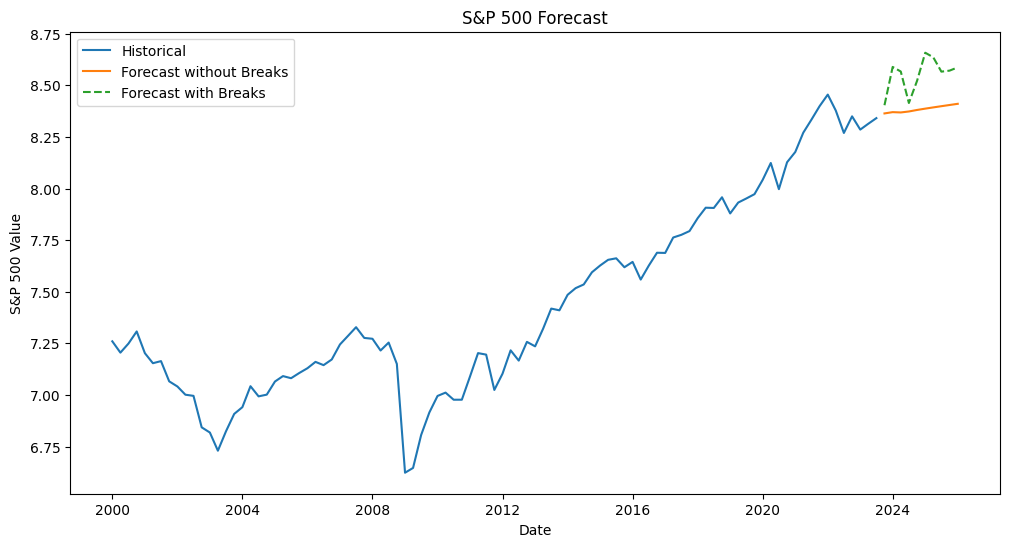

In [307]:
from statsmodels.tsa.vector_ar.vecm import VECM
import matplotlib.pyplot as plt
import pandas as pd

# Converting the DateTimeIndex to a PeriodIndex with quarterly frequency
# 'Q' denotes quarterly frequency, and 'QS' specifies that the frequency starts at the beginning of the quarter
# Assuming 'filtered_df' is your DataFrame and includes necessary variables

# Creating dummy variables for structural breaks
break_dates = ['2002-07-01', '2008-10-01', '2011-04-01', '2013-10-01', '2020-01-01']
#for date in break_dates:
#    filtered_df[f'Dummy_{date}'] = (filtered_df.index >= pd.to_datetime(date)).astype(int)

# Fitting VECM without structural breaks
vecm_no_breaks = VECM(data.drop(columns=[f'dummy_{date}' for date in break_dates]), k_ar_diff=2, coint_rank=1)
vecm_fit_no_breaks = vecm_no_breaks.fit()
forecast_no_breaks = vecm_fit_no_breaks.predict(steps=10)

# Fitting VECM with structural breaks
vecm_with_breaks = VECM(data, k_ar_diff=8, coint_rank=1)
vecm_fit_with_breaks = vecm_with_breaks.fit()
forecast_with_breaks = vecm_fit_with_breaks.predict(steps=10)

# Forecast index for plotting, starting from the quarter following 2023-07-01
forecast_start = pd.to_datetime("2023-07-01")
forecast_index = pd.date_range(start=forecast_start, periods=10, freq='Q').to_period(freq='Q')

# Plotting the forecast without structural breaks
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['S&P 500'], label='Historical')
plt.plot(forecast_index, forecast_no_breaks[:, 2], label='Forecast without Breaks')  # Assuming S&P 500 is the first variable

# Plotting the forecast with structural breaks
plt.plot(forecast_index, forecast_with_breaks[:, 2], label='Forecast with Breaks', linestyle='--')
plt.legend()
plt.title("S&P 500 Forecast")
plt.xlabel("Date")
plt.ylabel("S&P 500 Value")
plt.show()


In [196]:
forecast_index

DatetimeIndex(['2023-12-31', '2024-03-31', '2024-06-30', '2024-09-30',
               '2024-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [184]:
filtered_df

,10YR_Treasury_Yield,Real_GDP US,S&P 500,dummy_2002-07-01,dummy_2008-10-01,dummy_2011-04-01,dummy_2013-10-01,dummy_2020-01-01
Date,,,,,,,,
2000-01-01,1.868721,9.538071,7.259820,0,0,0,0,0
2000-04-01,1.821318,9.556120,7.204959,0,0,0,0,0
2000-07-01,1.773256,9.557139,7.249180,0,0,0,0,0
2000-10-01,1.717395,9.563091,7.307685,0,0,0,0,0
2001-01-01,1.619388,9.559808,7.202378,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2022-07-01,1.134623,9.992008,8.269081,1,1,1,1,1
2022-10-01,1.342865,9.998342,8.349598,1,1,1,1,1
2023-01-01,1.294727,10.003891,8.285347,1,1,1,1,1


In [183]:
forecast_with_breaks

array([[ 1.49998249, 10.02651634,  8.37608349,  1.00978843,  0.98939436,
         1.011649  ,  1.03976361,  1.0160872 ],
       [ 1.5190927 , 10.03110164,  8.40591296,  1.02725728,  0.99059487,
         1.01296167,  1.05363885,  1.00732257],
       [ 1.53039272, 10.03856684,  8.41904793,  1.03735076,  0.99249973,
         1.01595151,  1.06336459,  1.00002249],
       [ 1.54747485, 10.04331549,  8.43904718,  1.04535149,  0.99274089,
         1.01745387,  1.07031973,  1.00291105],
       [ 1.55809917, 10.04672741,  8.45708721,  1.05250881,  0.99601816,
         1.02313648,  1.07685208,  1.0102408 ]])

In [181]:
forecast_no_breaks

array([[ 1.46133974, 10.02590722,  8.36367325],
       [ 1.43474529, 10.03001149,  8.36993529],
       [ 1.39797952, 10.03566144,  8.36839455],
       [ 1.37389408, 10.04125735,  8.37313207],
       [ 1.35716246, 10.04675577,  8.38048186]])

Based on the VAR Order Selection summaries you've provided for the VECM models with and without structural breaks, we can determine the best models by looking at the information criteria—specifically, the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), Final Prediction Error (FPE), and Hannan-Quinn Information Criterion (HQIC). The best model is typically the one with the lowest values for these criteria.

For the VECM without structural breaks:

The AIC, BIC, and FPE all reach their minimum values at lag 2.
Therefore, the best model according to all these criteria is the one with 2 lags.
For the VECM with structural breaks:

The AIC and HQIC reach their minimum values at lag 9.
The BIC and FPE reach their minimum values at lag 2.
There is a discrepancy here between the criteria. In practice, the choice between AIC and BIC depends on your specific goals: AIC is better for predictive models, while BIC is better for explanatory models. Since BIC penalizes model complexity more heavily, it tends to choose simpler models than AIC.

Given the information, you might choose:

Lag 2 for the model with structural breaks if you prioritize BIC and FPE (which suggest a more parsimonious model).
Lag 9 if you prioritize AIC and HQIC (which may capture more dynamics but at the cost of added complexity).
In summary:

Best model for VECM without structural breaks: 2 lags
Best model for VECM with structural breaks: 2 lags (BIC, FPE) or 9 lags (AIC, HQIC), depending on the criterion you prioritize.